1. Chargement et exploration des données

In [42]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import MissingIndicator, KNNImputer,SimpleImputer
from sklearn.impute import IterativeImputer

In [43]:
# Charger les données
df = pd.read_csv(r"C:\Users\kadas\Desktop\Mes_cours\SCORING\hmeq.csv")

# Afficher les premières lignes pour une vue d'ensemble
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


2. Résumé des valeurs manquantes

In [44]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [45]:
# Tableau des valeurs manquantes par colonne
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

         Missing Values  Percentage
BAD                   0    0.000000
LOAN                  0    0.000000
MORTDUE             518    8.691275
VALUE               112    1.879195
REASON              252    4.228188
JOB                 279    4.681208
YOJ                 515    8.640940
DEROG               708   11.879195
DELINQ              580    9.731544
CLAGE               308    5.167785
NINQ                510    8.557047
CLNO                222    3.724832
DEBTINC            1267   21.258389


In [46]:
cat_col = ['BAD', 'REASON', 'JOB']
num_col = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLAGE', 'CLNO', 'DEBTINC', 'DEROG', 'NINQ', 'DELINQ']


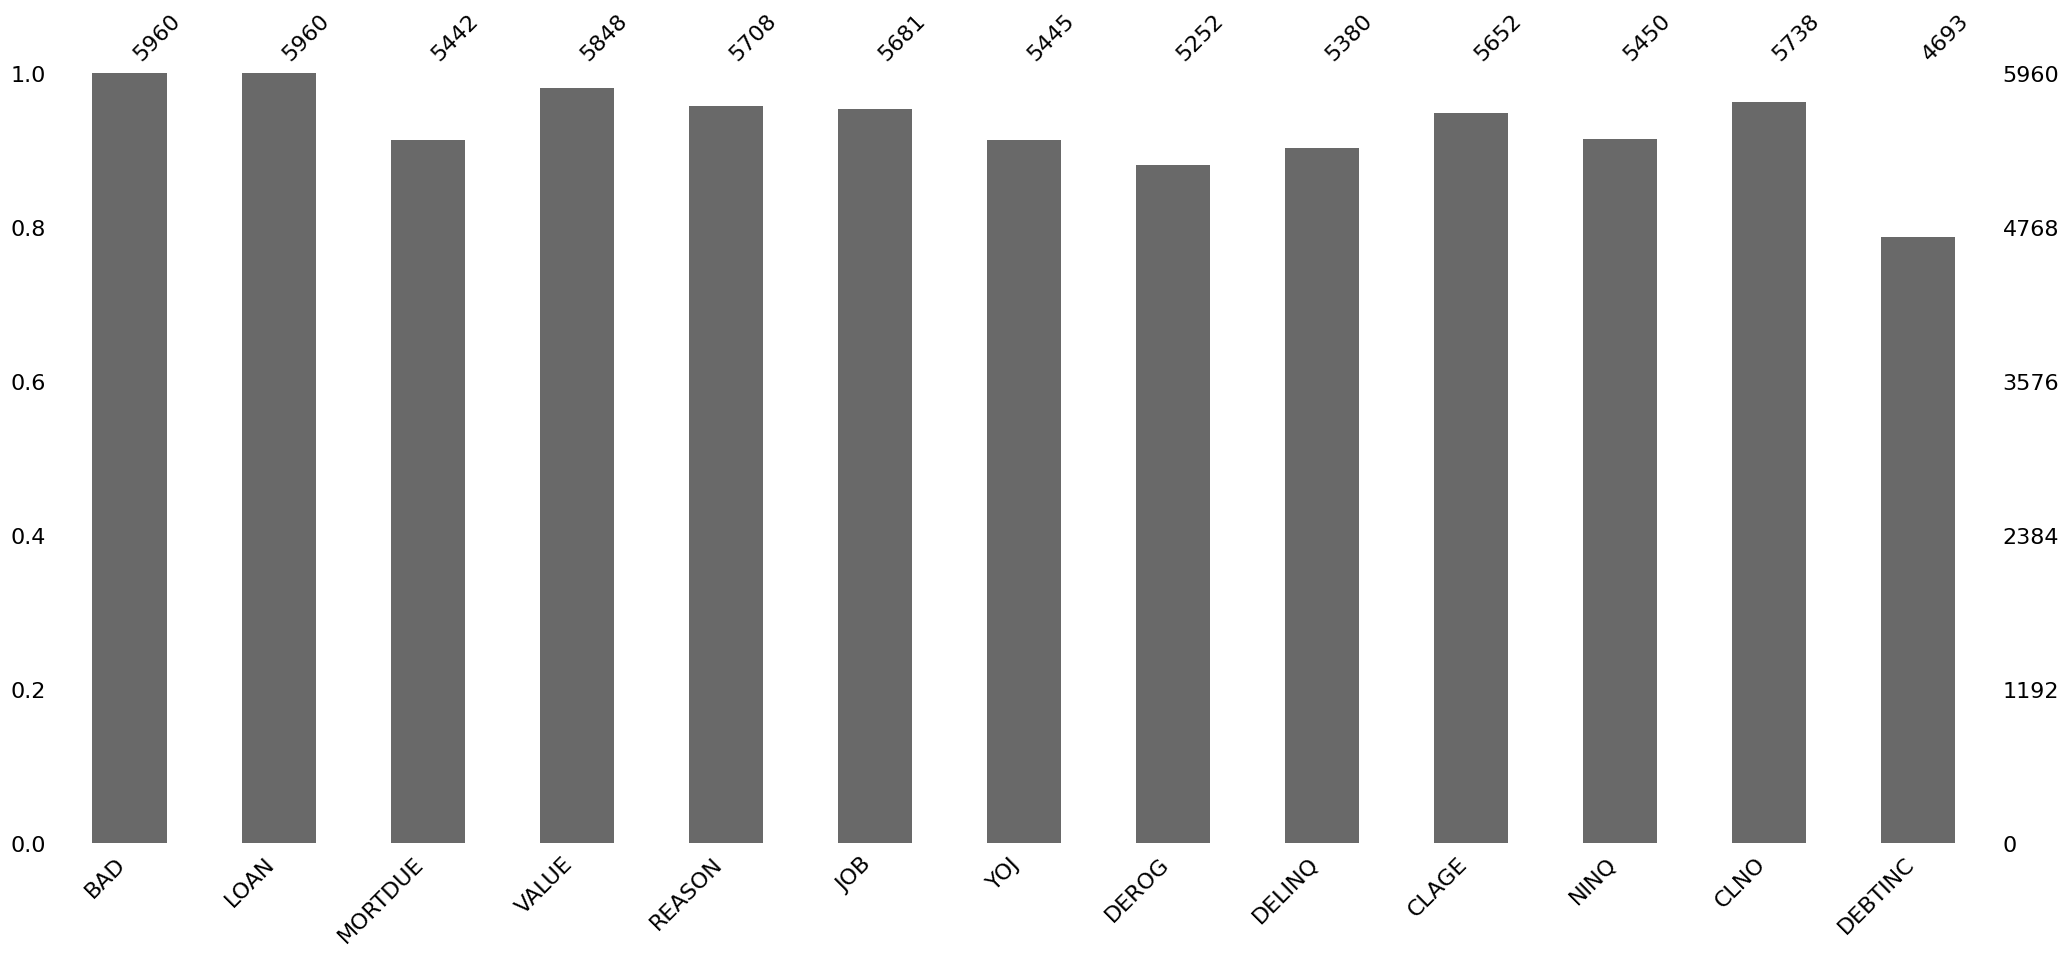

In [47]:
msno.bar(df)
plt.show()

* La carte thermique de corrélation des valeurs manquantes

Elle met en évidence les relations entre les valeurs manquantes des différentes variables.

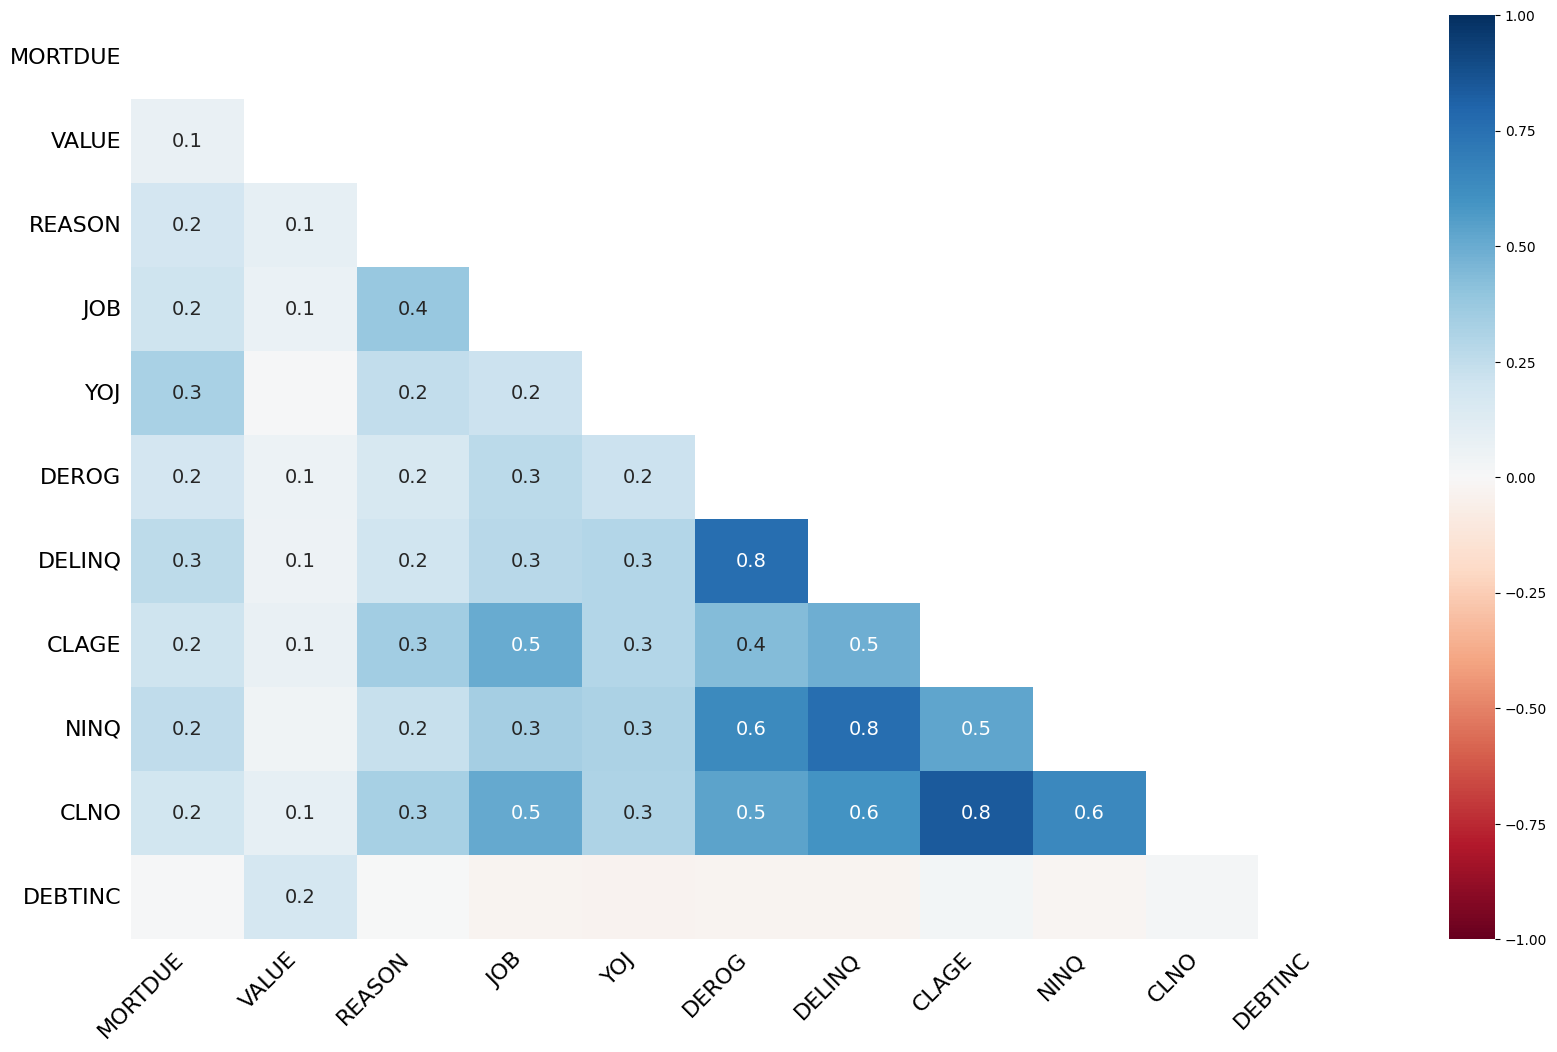

In [48]:
msno.heatmap(df)
plt.show()

Nous sommes confronté à un cas de données manquantes MAR 

- DEROG et DELINQ (Corrélation forte : 0.8) :  Probablement MAR  car ces deux variables sont liées aux comportements de crédit des individus.

Il y a une forte corrélation des valeurs manquantes entre DEROG (nombre de rapports dérogatoires) et DELINQ (nombre de lignes de crédit en retard). Cela signifie que, lorsque les données sont manquantes pour DEROG, elles sont souvent manquantes pour DELINQ.

Stratégie d'imputation : Imputer ces deux variables ensemble à l'aide d'une méthode KNN, car elles sont liées et leur absence semble dépendante de facteurs communs.


In [49]:
# Imputation par KNN    flexible qui fonctionne bien pour l'imputation des valeurs manquantes MAR 
imputer_knn = KNNImputer(n_neighbors=5)
df[['DEROG', 'DELINQ']] = imputer_knn.fit_transform(df[['DEROG', 'DELINQ']])


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5960 non-null   float64
 8   DELINQ   5960 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


* CLNO, CLAGE, et NINQ (Corrélation modérée)

In [51]:
from sklearn.impute import KNNImputer
imputer_knn = KNNImputer(n_neighbors=5)
df[['CLNO', 'CLAGE', 'NINQ']] = imputer_knn.fit_transform(df[['CLNO', 'CLAGE', 'NINQ']])


* YOJ et MORTDUE (Corrélation faible)

L'imputation par la moyenne consiste à remplacer les valeurs manquantes par la moyenne des valeurs 
non manquantes dans la variable. Cette méthode est utile pour les variables continues et symétriques.

L'imputation par la médiane consiste à remplacer les valeurs manquantes par la médiane des valeurs non
manquantes dans la variable. Cette méthode est utile pour les variables continues qui ont une distribution
 asymétrique ou pour les variables ordinales.

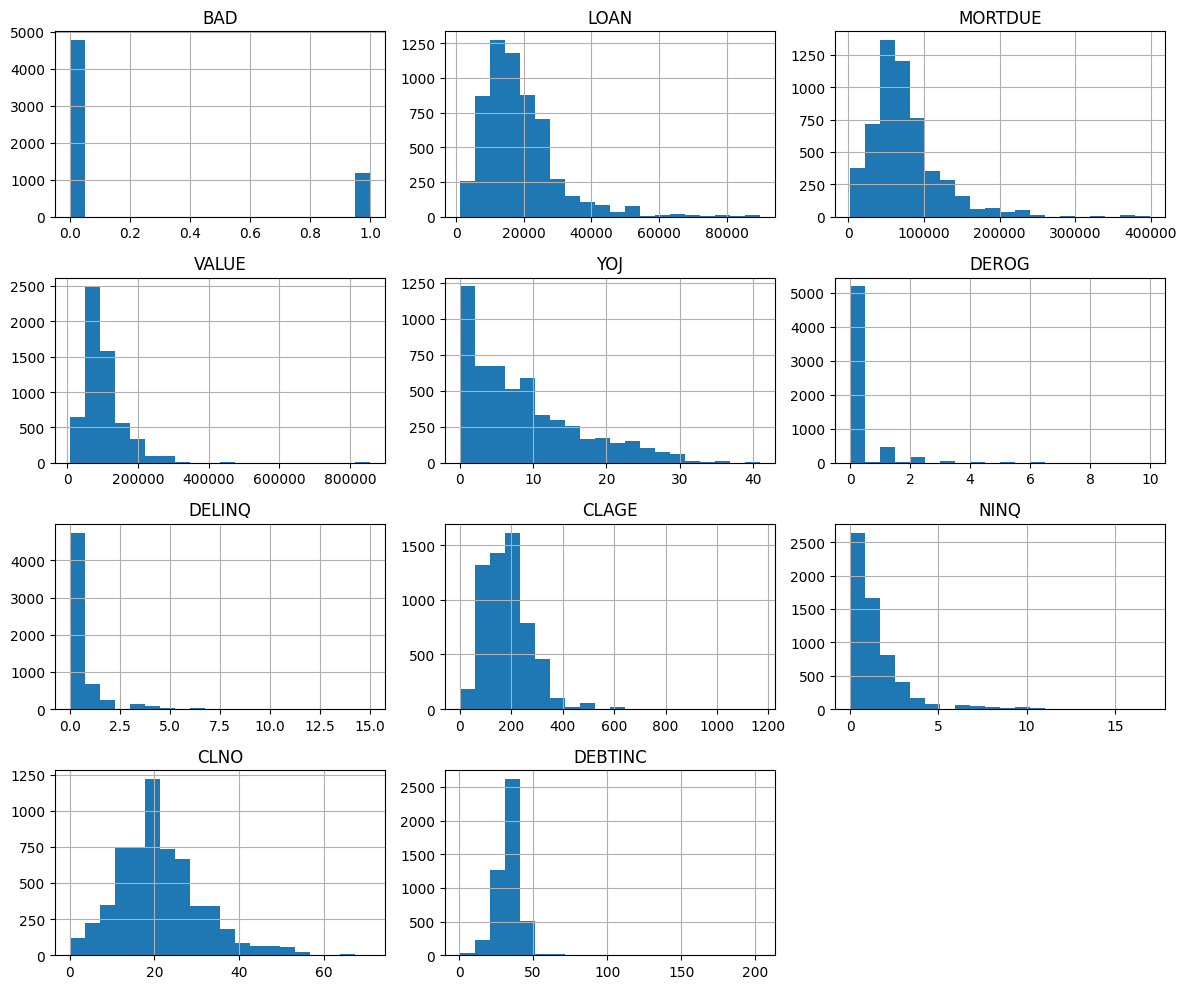

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Afficher les histogrammes pour toutes les variables numériques
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()


In [54]:
df['YOJ'].fillna(df['YOJ'].median(), inplace=True)
df['MORTDUE'].fillna(df['MORTDUE'].median(), inplace=True)

C:\Users\kadas\AppData\Local\Temp\ipykernel_19384\617750320.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YOJ'].fillna(df['YOJ'].median(), inplace=True)
C:\Users\kadas\AppData\Local\Temp\ipykernel_19384\617750320.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5960 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5960 non-null   float64
 7   DEROG    5960 non-null   float64
 8   DELINQ   5960 non-null   float64
 9   CLAGE    5960 non-null   float64
 10  NINQ     5960 non-null   float64
 11  CLNO     5960 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


* Imputation par le mode

In [56]:
df['REASON'].fillna(df['REASON'].mode()[0], inplace=True)
df['JOB'].fillna(df['JOB'].mode()[0], inplace=True)

C:\Users\kadas\AppData\Local\Temp\ipykernel_19384\2763212865.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['REASON'].fillna(df['REASON'].mode()[0], inplace=True)
C:\Users\kadas\AppData\Local\Temp\ipykernel_19384\2763212865.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5960 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5960 non-null   object 
 5   JOB      5960 non-null   object 
 6   YOJ      5960 non-null   float64
 7   DEROG    5960 non-null   float64
 8   DELINQ   5960 non-null   float64
 9   CLAGE    5960 non-null   float64
 10  NINQ     5960 non-null   float64
 11  CLNO     5960 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


* DEBTINC (Corrélation faible avec les autres variables) et distr asymétrique 

car la médiane est moins influencée par les valeurs extrêmes que la moyenne.

Type de valeur manquante : MCAR ou MAR, car les informations sur la dette 
et le revenu peuvent être manquantes pour des raisons aléatoires (par exemple, informations non collectées).


In [58]:
df['DEBTINC'].fillna(df['DEBTINC'].median(), inplace=True)


C:\Users\kadas\AppData\Local\Temp\ipykernel_19384\147243079.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DEBTINC'].fillna(df['DEBTINC'].median(), inplace=True)


In [59]:
df['VALUE'].fillna(df['VALUE'].median(), inplace=True)


C:\Users\kadas\AppData\Local\Temp\ipykernel_19384\1798197296.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['VALUE'].fillna(df['VALUE'].median(), inplace=True)


# ANALYSE DESCRIPTIVE

 * Variables Quantitatives

In [60]:
# Statistiques descriptives pour les variables quantitatives
df.describe()

# # Histogrammes
# df.hist(figsize=(12, 10), bins=20)
# plt.tight_layout()
# plt.show()



,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,0.199497,18607.969799,73001.041812,101540.387423,8.756166,0.263397,0.449978,181.435259,1.198776,21.296096,34.000651
std,0.399656,11207.480417,42552.726779,56869.436682,7.259424,0.802005,1.071317,87.566526,1.682780,9.948280,7.644528
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,48139.000000,66489.500000,3.000000,0.000000,0.000000,116.761588,0.000000,15.000000,30.763159
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,177.466349,1.000000,21.000000,34.818262
75%,0.000000,23300.000000,88200.250000,119004.750000,12.000000,0.000000,0.449442,229.514130,2.000000,26.000000,37.949892
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


* Qualitatif vs Qualitatif

In [61]:
from scipy.stats import chi2_contingency

# Tableau croisé pour JOB et REASON
contingency_table = pd.crosstab(df['JOB'], df['REASON'])
print(contingency_table)

# Test du chi² pour évaluer la dépendance
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi² : {chi2}, p-value : {p}")


REASON   DebtCon  HomeImp
JOB                      
Mgr          593      174
Office       647      301
Other       1894      773
ProfExe      871      405
Sales         97       12
Self          78      115
Chi² : 123.50365285144892, p-value : 5.6802445615001605e-25


In [ ]:
# Charger les données
df = pd.read_csv(r"C:\Users\kadas\Desktop\Mes_cours\SCORING\hmeq.csv")

# Afficher les premières lignes pour une vue d'ensemble
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


* Analyse des Variables Catégorielles (Modalités)

JOB      Mgr  Office  Other  ProfExe  Sales  Self
REASON                                           
DebtCon  593     647   1894      871     97    78
HomeImp  174     301    773      405     12   115


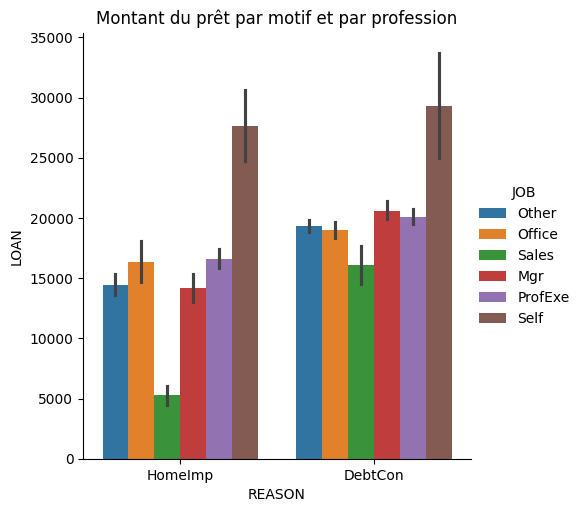

In [62]:
# Tableau croisé REASON et JOB (CSP)
reason_job = pd.crosstab(df['REASON'], df['JOB'])
print(reason_job)
import seaborn as sns
# Visualiser la répartition des montants de LOAN selon la REASON et la JOB (CSP)
sns.catplot(x='REASON', y='LOAN', hue='JOB', kind='bar', data=df)
plt.title('Montant du prêt par motif et par profession')
plt.show()


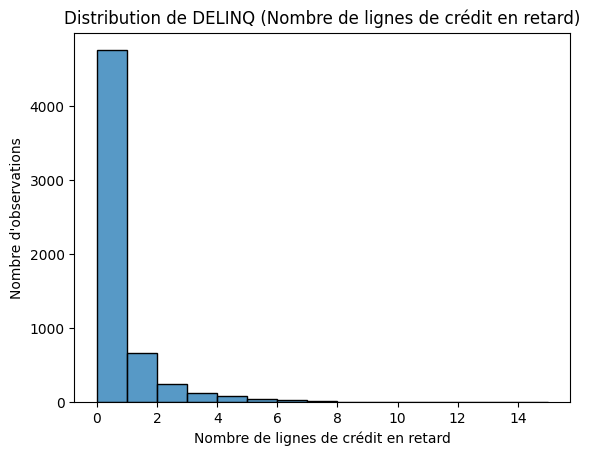

DELINQ
0.000000     4179
1.000000      654
0.449442      503
2.000000      250
3.000000      129
4.000000       78
0.400000       63
5.000000       38
6.000000       27
7.000000       13
0.800000        8
1.200000        5
8.000000        5
11.000000       2
10.000000       2
15.000000       1
12.000000       1
0.200000        1
13.000000       1
Name: count, dtype: int64


In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Afficher la distribution de DELINQ
sns.histplot(df['DELINQ'], kde=False, bins=15)
plt.title("Distribution de DELINQ (Nombre de lignes de crédit en retard)")
plt.xlabel("Nombre de lignes de crédit en retard")
plt.ylabel("Nombre d'observations")
plt.show()

# Voir les valeurs uniques et leur fréquence
print(df['DELINQ'].value_counts())
